# Edmunds Forums - Product Comparison Network & Page Rank

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import numpy
import matplotlib.pyplot as plt
import collections
import networkx as nx
from scipy.stats.stats import pearsonr
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Populating the interactive namespace from numpy and matplotlib


From these sentiment scores, create a directed product comparison network 

In [2]:
binary_adjacency_matrix = pd.read_csv('BinaryAdj.csv', header=False)

In [3]:
binary_adjacency_matrix[:3]

,from/to,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,ES,0,1,1,1,1,1,1,1,1,1
1,LS,1,0,1,1,1,1,1,1,1,1
2,RX,1,1,0,1,0,1,0,1,0,1


In [4]:
A = numpy.matrix(binary_adjacency_matrix.drop('from/to', 1))

In [5]:
A.shape

(10L, 10L)

In [6]:
G2=nx.from_numpy_matrix(A, create_using=nx.DiGraph())

{0: <matplotlib.text.Text at 0x17be8e48>,
 1: <matplotlib.text.Text at 0x19001c50>,
 2: <matplotlib.text.Text at 0x19001fd0>,
 3: <matplotlib.text.Text at 0x1900d3c8>,
 4: <matplotlib.text.Text at 0x1900d780>,
 5: <matplotlib.text.Text at 0x1900db38>,
 6: <matplotlib.text.Text at 0x1900def0>,
 7: <matplotlib.text.Text at 0x1901a2e8>,
 8: <matplotlib.text.Text at 0x1901a6a0>,
 9: <matplotlib.text.Text at 0x1901aa58>}

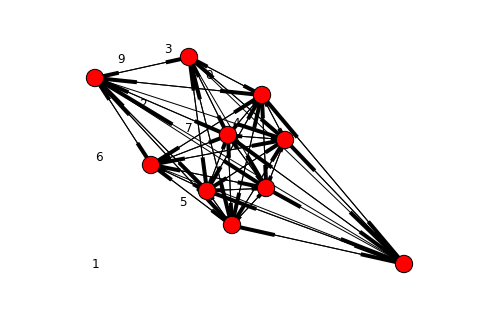

In [7]:
nx.draw(G2)
nx.draw_networkx_labels(G2, pos=nx.spring_layout(G2))

In [8]:
car_list = binary_adjacency_matrix.columns[1:]

In [9]:
len(car_list)

10

In [10]:
G3=G2

In [11]:
list09 = [0,1,2,3,4,5,6,7,8,9]

In [12]:
car_list = list(car_list)
car_list

['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ', 'Sclass']

In [13]:
mapping = dict(zip(list09, car_list))

In [14]:
G3 = nx.relabel_nodes(G3, mapping)

In [15]:
G3.nodes()

['XJ', '7series', 'Sclass', 'RX', 'LS', 'A6', 'A8', '3series', 'ES', '5series']

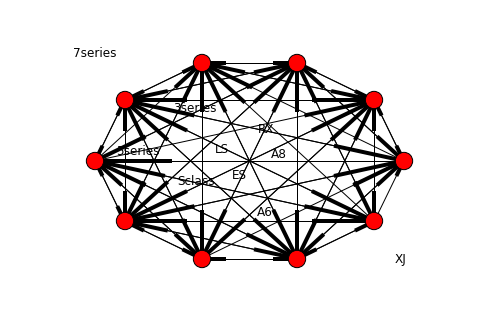

In [16]:
nx.draw_circular(G3)
nx.draw_networkx_labels(G3, pos=nx.spring_layout(G3))
plt.show()

Calculate both unweighted and weighted PageRank scores for each car. What are the correlations between these metrics and sales figures?

In [17]:
unweighted_pageranks = nx.pagerank(G3)

In [18]:
unweighted_pageranks = collections.OrderedDict(sorted(unweighted_pageranks.items(),
                                          key=lambda t: t[0]))
unweighted_pageranks

OrderedDict([('3series', 0.09252639002146147), ('5series', 0.07750004212875027), ('7series', 0.10946398181419068), ('A6', 0.08536735073305558), ('A8', 0.11064475005772707), ('ES', 0.11064475005772707), ('LS', 0.11064475005772707), ('RX', 0.10606820030437387), ('Sclass', 0.11064475005772707), ('XJ', 0.08649503476725975)])

In [19]:
sales_dict = {
    '3series': 220000,
    '5series': 12000,
    '7series': 14000,
    'A6': 20000,
    'A8': 12000,
    'ES': 135000,
    'LS': 30000,
    'RX': 120000,
    'Sclass': 25000,
    'XJ': 6600
}

In [20]:
sales = collections.OrderedDict(sorted(sales_dict.items(),
                                          key=lambda t: t[0]))

In [21]:
pearsonr(unweighted_pageranks.values(), sales.values())

(0.083096650833011432, 0.81947604333585899)

The correlation between unweighted pagerank scores and sales values is low, at .083.
This indicates that unweighted pagerank scores would not be very helpful in predicting sales values, as the high p-value confirms.

In [22]:
weighted_adjacency_matrix = pd.read_csv('WeightedAdj.csv')

In [23]:
weighted_adjacency_matrix[:3]

,from/to,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,ES,0.00,2.0,2.000000,3.000000,1.666667,6,5.0,2.80,1.000000,2.615385
1,LS,1.17,0.0,1.285714,2.837838,1.285714,4,3.1,2.75,2.888889,2.677419
2,RX,1.67,3.4,0.000000,1.000000,0.000000,4,0.0,1.00,0.000000,2.500000


In [24]:
B = numpy.matrix(weighted_adjacency_matrix.drop('from/to', 1))

In [25]:
G4=nx.from_numpy_matrix(B, create_using=nx.DiGraph())

In [26]:
G4 = nx.relabel_nodes(G4, mapping)

In [27]:
weighted_pageranks = nx.pagerank(G4)

In [28]:
weighted_pageranks

{'3series': 0.13594317001598172,
 '5series': 0.08832806236702921,
 '7series': 0.10090699153776964,
 'A6': 0.07122680833286149,
 'A8': 0.09851518303915444,
 'ES': 0.10929936690055869,
 'LS': 0.11140141338848428,
 'RX': 0.10603333749233616,
 'Sclass': 0.10366414644789475,
 'XJ': 0.07468152047792978}

In [29]:
weighted_pageranks = collections.OrderedDict(sorted(weighted_pageranks.items(),
                                          key=lambda t: t[0]))
weighted_pageranks

OrderedDict([('3series', 0.13594317001598172), ('5series', 0.08832806236702921), ('7series', 0.10090699153776964), ('A6', 0.07122680833286149), ('A8', 0.09851518303915444), ('ES', 0.10929936690055869), ('LS', 0.11140141338848428), ('RX', 0.10603333749233616), ('Sclass', 0.10366414644789475), ('XJ', 0.07468152047792978)])

In [30]:
pearsonr(weighted_pageranks.values(), sales.values())

(0.76415938834659614, 0.01006807334377121)

Correlation between weighted pagerank scores and sales values is .764.
This is a much higher value than with unweighted pagerank scores, so we can see the importance in using weighted pagerank scores instead of unweighted.
This is reflected in the p-value of .01 as well.

Generate sentiment scores with your script, find weighted PageRank of each of the 10 cars and correlate with the sales figures above. How does the correlation of this automated approach compare with that of manual scoring

In [41]:
reviews = pd.read_csv('Assignment 3 Edmunds Posts.csv')

In [42]:
reviews = reviews['Posts']

In [43]:
# reviews is a series of strings. Each string is a whole review.

In [246]:
stops = stopwords.words('english')
lower_reviews = []
for review in reviews:
    review = re.sub('[^a-zA-Z0-9]', ' ', review)
    tokenized = word_tokenize(review)
    no_stops = [i for i in tokenized if i not in stops]
    review = ' '.join(no_stops)
    lower_reviews.append(review.lower())
#for review in lower_reviews:
#    review = [i for i in lower_reviews if i not in stops]


In [248]:
len(lower_reviews)

230

In [47]:
# lower_reviews is a list of strings. Each string is a whole review
# that is all lower case and has punctuation and stopwords removed.

In [227]:
es_review_list = []
for review in lower_reviews:
    es_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+xj+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s",
                                    review))
es_review_list

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['honest with yourself    the a8  xj  7  s and phaeton all '],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['at the time 290hp   and xj 294hp   so this audi s '],
 ['are beautiful cars  especially the xj and xk  but i think '],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ls600hl  7series  7seriesl  a8  a8l  xj    methinks not  mb needs another '],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['cars like thesclass  lexusls  and xj almost always complain about the ',
  's  a8 or non  r  xj  the upcoming s8 will soon '],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['it going either way 

In [124]:
es_review_list_of_strings = []
for review in es_review_list:
    review_string = ""
    for chunk in review:
        review_string = review_string + chunk
    es_review_list_of_strings.append(review_string)

In [130]:
#create a text file where each row is a new review:
txt_file = open("C:/Users/Bob/Downloads/ES_Reviews.txt", "w")

In [131]:
txt_file.write('header \n')
for review in es_review_list_of_strings:
    txt_file.write(' ' + review + '\n')

In [132]:
txt_file.close()

In [156]:
ES_results = pd.read_csv('C:/Users/Bob/Downloads/ES_Reviews+results.csv', header=False)

In [158]:
ES_results = ES_results['score']

In [226]:
car_list

['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ', 'Sclass']

In [278]:
len(lower_reviews)

230

In [289]:
Car_Senti_Scores = pd.DataFrame()
for car in car_list:
    car_review_list = []
    for review in lower_reviews:
        car_single_review_list = []
        car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+" + car.lower() + "+[\sa-z]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]", review))
        if car == '3series':
            car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+3[0-9][0-9]+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s", review))
        if car == '5series':
            car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+5[0-9][0-9]+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s", review))
        if car == '7series':
            car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+7[0-9][0-9]+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s", review))
        if car == 'ES' or car == 'LS' or car == 'RX':
            car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+lexus" + car + "\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s", review))
            car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+lexus" + car + "[0-9][0-9][0-9][\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]", review))
            car_single_review_list.append(re.findall("\w+\s+\w+\s+\w+\s+\w+\s+\w+\s" + car + "[0-9][0-9][0-9][\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]+[\w\s]", review))
        car_single_review_string = ' '.join(car_single_review_list[0])
        car_review_list.append(car_single_review_string)
    car_review_list_of_strings = []
    for review in car_review_list:
        review_string = ""
        for chunk in review:
            review_string = review_string + chunk
        car_review_list_of_strings.append(review_string)
    txt_file = open(car + "_Reviews.txt", "w")
    txt_file.write('header \n')
    for review in car_review_list_of_strings:
        txt_file.write(' ' + review + '\n')
    txt_file.close()

**IMPORTANT**: NOW WE HAVE TO RUN SENTISTRENGTH ON ALL 10 CARS, CREATE CSV FILES OF THE SCORES FOR ALL 10 CARS

In [290]:
Car_Senti_Scores = pd.DataFrame()

In [291]:
for car in car_list:
    car_results = pd.read_csv(car + '_Reviews+results.csv', header=False)
    car_results = car_results['score']
    Car_Senti_Scores[car] = car_results

In [292]:
Car_Senti_Scores.shape

(230, 10)

In [293]:
Car_Senti_Scores.to_csv('SentiScoresPartC.csv', header=True, index=False)

**NOW WE CONVERT THIS MATRIX TO AN ADJACENCY MATRIX, JUST AS WE DID FOR PARTS A AND B.**

In [31]:
adjacency_matrix_c = pd.read_csv('partCunweightedAdjacency.csv')

In [32]:
M = numpy.matrix(adjacency_matrix_c.drop('from/to', 1))

In [33]:
comparison_graph_c = nx.from_numpy_matrix(M, create_using=nx.DiGraph())

In [34]:
comparison_graph_c = nx.relabel_nodes(comparison_graph_c, mapping)

In [35]:
weighted_pageranks_c = nx.pagerank(comparison_graph_c)

In [36]:
weighted_pageranks_c = collections.OrderedDict(sorted(weighted_pageranks_c.items(),
                                          key=lambda t: t[0]))

In [37]:
print numpy.corrcoef(weighted_pageranks_c.values(), sales.values())

[[ 1.          0.71084518]
 [ 0.71084518  1.        ]]


In [38]:
pearsonr(weighted_pageranks_c.values(), sales.values())

(0.71084517510574818, 0.021197814226925172)

Here we have a relatively high correlation between weighted pagerank scores and the sales values, which is exactly what we were shooting for. The p-value is low as well, and indicates that our calculated pagerank scores could be a decent predictor of sales values.